#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est effectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

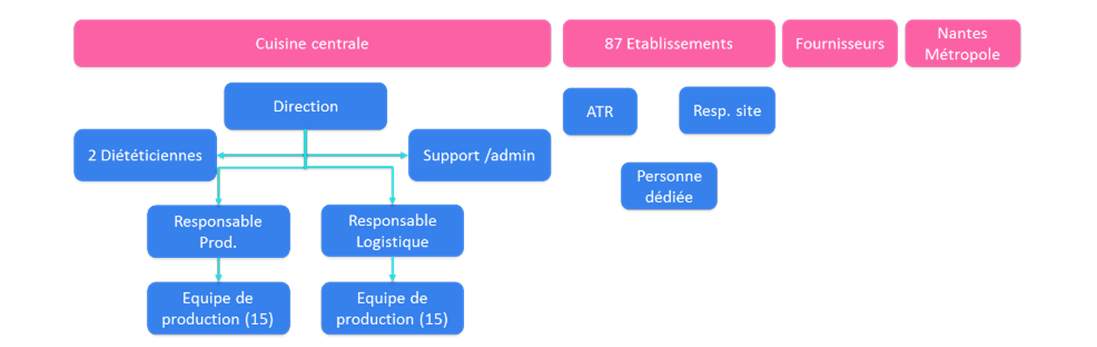

### 4 - Processus actuel

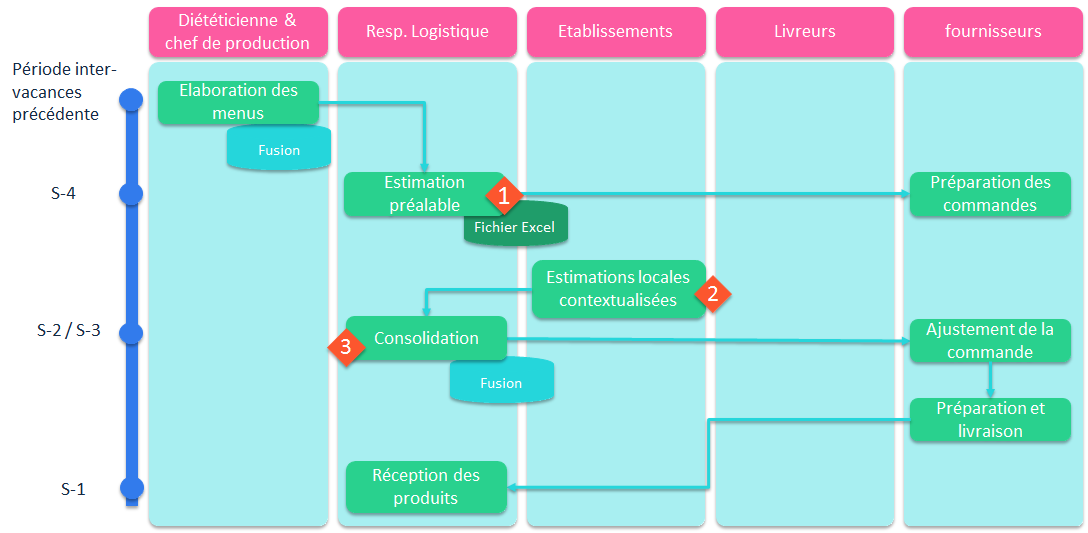

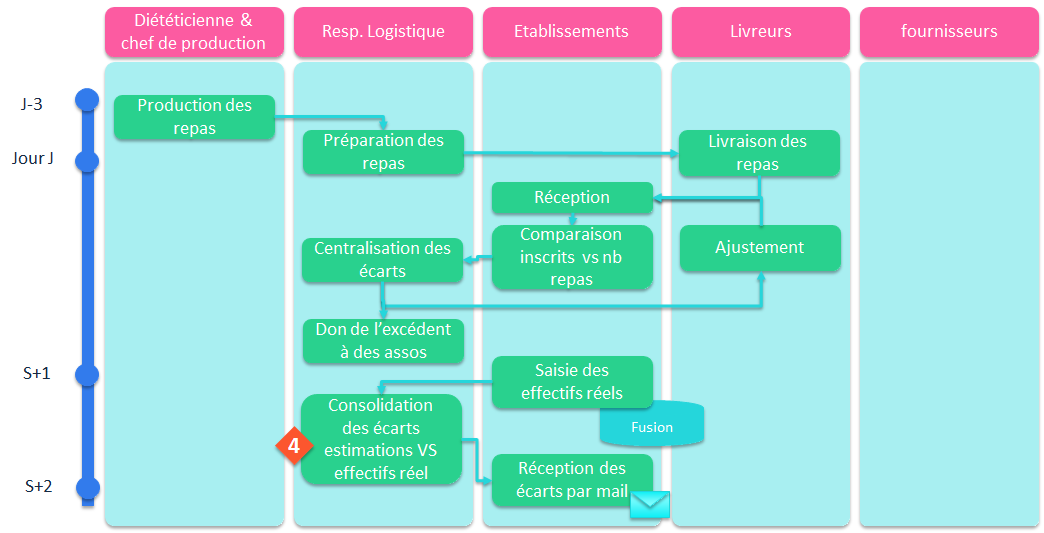

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 6 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


In [1]:
import pandas as pd

In [2]:
freq = pd.read_csv("frequentation.csv")

In [3]:
menu = pd.read_csv("menus.csv")

In [4]:
#Fusion des 2 dataframes sur la colonne 'Date'
df = pd.merge(freq, menu, on = ["date"], how = 'outer')

In [5]:
df

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,17373,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,17373,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,17373,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,17373,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,17373,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,20685,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,20685,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,20685,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,20685,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0


In [6]:
#Evaluation de la perte moyenne journalière & son incidence globale

ecarts = df['prevision'] - df['reel'] 
moyenne_ecarts = ecarts.mean()  
moyenne_ecarts


858.956228956229

Avec une moyenne de 859 repas prévus en trop par jour, entre 2010 et 2020, 1.020.492 repas ont été perdus. 
En estimant le coût d'un repas à 3€, la perte fiancière totale s'élève à 3.061.476€, d'où l'importance de ce projet. 

In [7]:
#Evaluation du nombre de jour où il y a eu plus d'enfants à manger à la cantine que de repas disponibles, la situation qu'on veut le plus éviter.
nombre_jour_manque = len(df[df['reel'] > df['prevision']])
nombre_jour_manque


16

In [8]:
#Nettoyage
#Un seul jour férié recensé, on enlève la colonne férié
df.drop(columns=['ferie'], inplace=True)


In [9]:
#Quels sont les jours les + et - fréquentés? 
moyenne_par_jour = df.groupby('jour')['reel'].mean()
moyenne_par_jour

jour
Jeudi       12714.837370
Lundi       12608.460481
Mardi       12627.936455
Mercredi     9589.888889
Vendredi    13485.210000
Name: reel, dtype: float64

In [10]:
#Sur combien de jours est basé le calcul?
number_of_day = df['jour'].value_counts()
number_of_day

jour
Vendredi    300
Mardi       299
Lundi       291
Jeudi       289
Mercredi      9
Name: count, dtype: int64

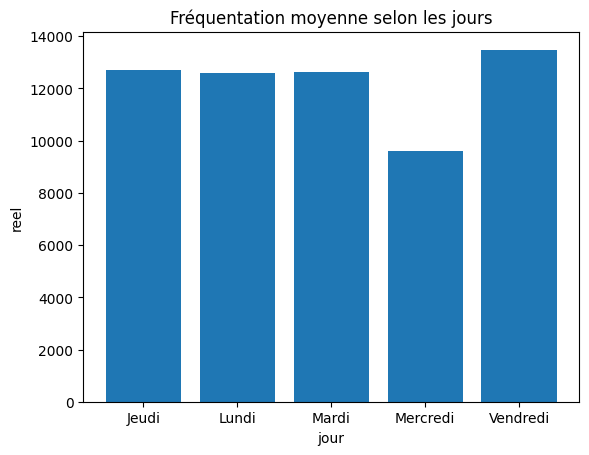

In [11]:
import matplotlib.pyplot as plt

x = moyenne_par_jour.index
y = moyenne_par_jour

plt.bar(x, y)
plt.xlabel('jour')
plt.ylabel('reel')
plt.title('Fréquentation moyenne selon les jours')
plt.show()

In [12]:
moyenne_par_mois = df.groupby('mois')['reel'].mean()
moyenne_par_mois

mois
Avril        13132.445652
Decembre     12922.917526
Fevrier      12528.242105
Janvier      12881.467626
Juillet      11371.120000
Juin         12528.385185
Mai          12640.830508
Mars         13094.908257
Novembre     13165.413534
Octobre      12676.282828
Septembre    13070.787671
Name: reel, dtype: float64

In [13]:
number_of_month = df['mois'].value_counts()
number_of_month

mois
Septembre    146
Janvier      139
Juin         135
Novembre     133
Mai          118
Mars         109
Octobre       99
Decembre      97
Fevrier       95
Avril         92
Juillet       25
Name: count, dtype: int64

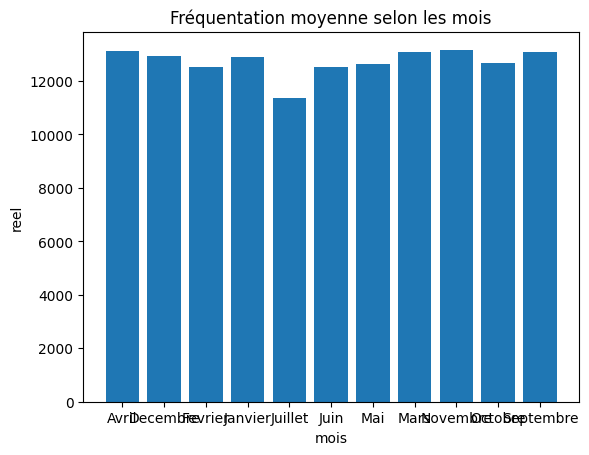

In [14]:
import matplotlib.pyplot as plt

x = moyenne_par_mois.index
y = moyenne_par_mois

plt.bar(x, y)
plt.xlabel('mois')
plt.ylabel('reel')
plt.title('Fréquentation moyenne selon les mois')
plt.show()

In [15]:
#On enlève les lignes des mercredis & celles où il y a O élèves dans les cantines, probablement fermées. 
df_filtre = df.drop(df[(df['jour'] == 'Mercredi') | (df['reel'] == 0)].index)
df_filtre


,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,vacances,...,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,17373,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,17373,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,17373,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,17373,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,17373,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,20685,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,20685,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,20685,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,20685,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0


In [16]:
df_filtre.drop(columns=['Unnamed: 0_x' ,'Unnamed: 0_y'], inplace=True)

In [17]:
# Calculer la proportion de fréquentation
df_filtre = df_filtre.assign(proportion=(df_filtre['reel'] / df_filtre['effectif']) * 100)
df_filtre

,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,vacances,retour_vacances,...,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,proportion
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,1,...,17373,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,64.059172
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,17373,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,67.967536
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,17373,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,67.581880
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,17373,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,70.926150
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,17373,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,...,20685,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,52.685521
1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,0,...,20685,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,31.143341
1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,0,...,20685,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,44.321972
1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,0,...,20685,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,59.806623


# Analyse univarié

### Proportion


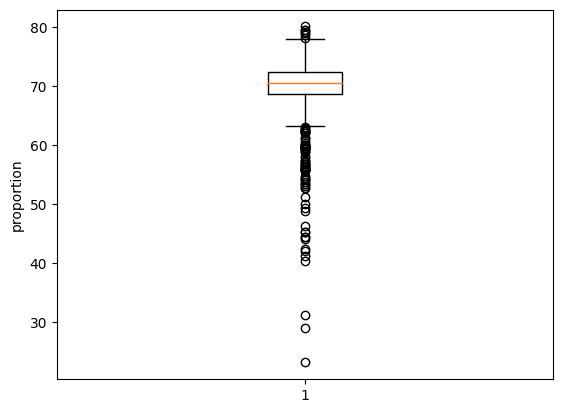

In [18]:
plt.boxplot(df_filtre["proportion"])
plt.ylabel("proportion")
plt.show()

In [19]:
import numpy as np

# Liste des déciles de 0.1 à 1.0
deciles = np.arange(0.1, 1.1, 0.1) 
proportion_deciles = df_filtre['proportion'].quantile(deciles)
proportion_deciles


0.1    65.948223
0.2    68.230762
0.3    69.106300
0.4    69.687866
0.5    70.463751
0.6    71.065134
0.7    71.907495
0.8    73.140638
0.9    74.910463
1.0    80.054993
Name: proportion, dtype: float64

90% des proportions se trouvent entre 65 et 80% de fréquentation. On va supprimer les quelques valeurs extrêmes car elles doivent correspondre à des situations exceptionnelles.

In [20]:
proportion_tri = df_filtre['proportion'].sort_values()
proportion_tri.head(15)

882     23.118549
887     28.910712
1184    31.143341
22      40.240603
1121    41.196422
323     42.024437
324     42.321489
969     44.037479
1185    44.321972
1062    44.322650
1002    45.224972
1061    45.236925
1187    46.197728
322     48.733326
733     49.312913
Name: proportion, dtype: float64

In [21]:
df_final = df_filtre[df_filtre['proportion'] >= 60]
df_final

,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,vacances,retour_vacances,...,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,proportion
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,1,...,17373,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,64.059172
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,17373,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,67.967536
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,17373,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,67.581880
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,17373,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,70.926150
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,17373,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,...,20685,"['Choux blancs bio à la mimolette', 'Boulettes...",0,1,0,1,0,0,0,77.128354
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,...,20685,"['Pizza au fromage', ""Rôti de dinde jus d'épic...",0,1,0,1,0,0,0,71.858835
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,...,20685,"['Céleri rémoulade bio', 'Lieu sauce du Perray...",0,0,1,1,0,0,0,79.395697
1181,2019-12-02,2019-2020,Lundi,49,Decembre,0,0,0,0,0,...,20685,"['Salade coleslaw', 'Raviolis de légumes ', 'S...",0,0,0,0,0,0,0,73.797438


## Incidence des maladies par mois

### Gastro

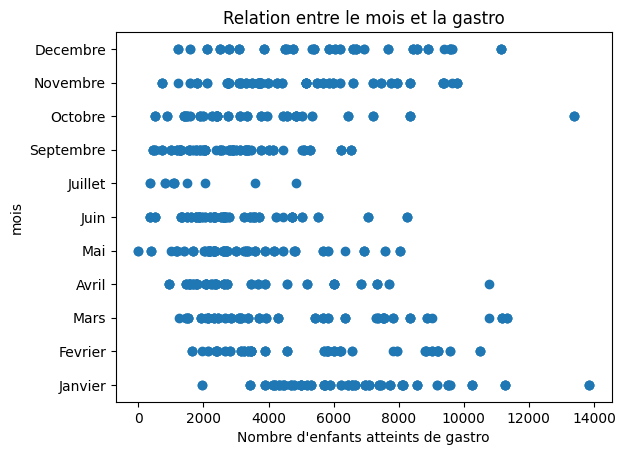

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df_final['inc_gastro'], df_final['mois'])
plt.xlabel('Nombre d\'enfants atteints de gastro')
plt.ylabel('mois')
plt.title('Relation entre le mois et la gastro')
plt.show()

### Grippe

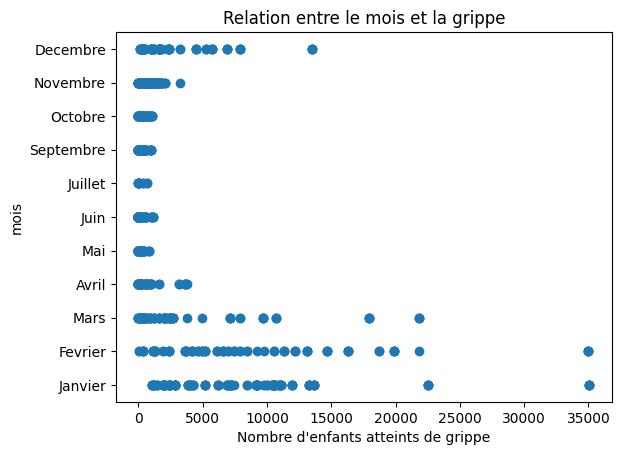

In [23]:
import matplotlib.pyplot as plt

plt.scatter(df_final['inc_grippe'], df_final['mois'])
plt.xlabel('Nombre d\'enfants atteints de grippe')
plt.ylabel('mois')
plt.title('Relation entre le mois et la grippe')
plt.show()

### Varicelle

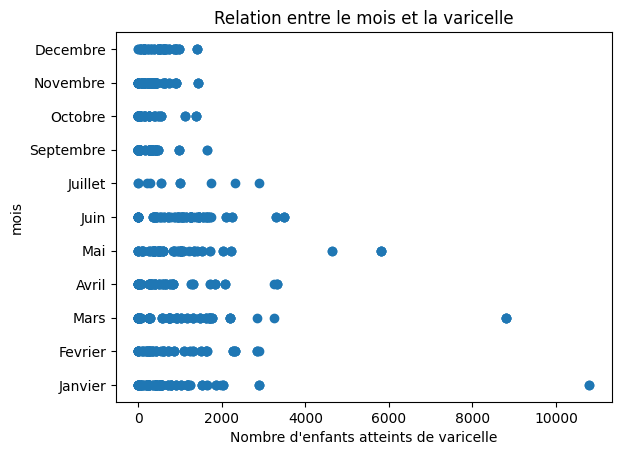

In [24]:
import matplotlib.pyplot as plt

plt.scatter(df_final['inc_varicelle'], df_final['mois'])
plt.xlabel('Nombre d\'enfants atteints de varicelle')
plt.ylabel('mois')
plt.title('Relation entre le mois et la varicelle')
plt.show()

## Jours particuliers

In [25]:
df_final.greves.value_counts()

greves
0    1032
1      53
Name: count, dtype: int64

In [26]:
df_final.veille_ferie.value_counts()

veille_ferie
0    1074
1      11
Name: count, dtype: int64

In [27]:
df_final.retour_ferie.value_counts()

retour_ferie
0    1061
1      24
Name: count, dtype: int64

In [28]:
df_final.vacances.value_counts()

vacances
0    1056
1      29
Name: count, dtype: int64

In [29]:
df_final.veille_vacances.value_counts()

veille_vacances
0    1055
1      30
Name: count, dtype: int64

In [30]:
df_final.retour_vacances.value_counts()

retour_vacances
0    1053
1      32
Name: count, dtype: int64

In [31]:
df_final.fete_chretienne.value_counts()

fete_chretienne
0    1000
1      85
Name: count, dtype: int64

In [32]:
df_final.fete_musulmane.value_counts()

fete_musulmane
0    1061
1      24
Name: count, dtype: int64

In [33]:
df_final.fete_juive.value_counts()

fete_juive
0    1054
1      31
Name: count, dtype: int64

In [34]:
df_final.ramadan.value_counts()

ramadan
0    1025
1      60
Name: count, dtype: int64

# Analyse bivariée

## Corrélations

Quelques corrélations à explorer :

--> Fréquentation & Incidence des maladies

--> Fréquentation & Fêtes religieuses

--> Fréquentation & Menus

--> Mois & Maladie

--> Fréquence & Jours

In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Observe-t-on une relation entre l'incidence de maladies et la présence en cantines? COV 

#### Grippe

In [36]:
df_freq_grippe = df_final[['proportion','inc_grippe']]


In [37]:
df_freq_grippe = df_freq_grippe.groupby('proportion').agg({'inc_grippe':'sum'}).reset_index()

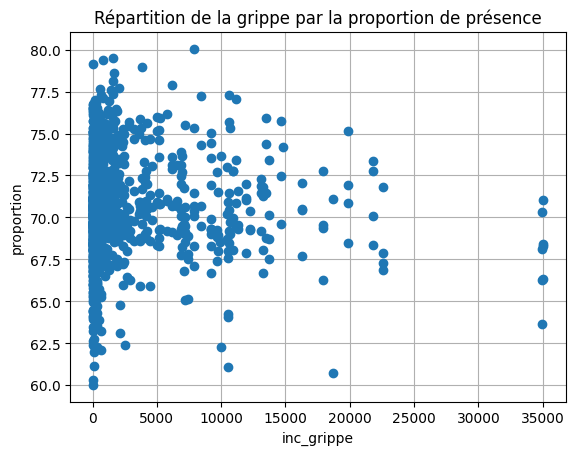

In [38]:
import matplotlib.pyplot as plt

plt.plot(df_freq_grippe["inc_grippe"],df_freq_grippe["proportion"],'o')
plt.xlabel("inc_grippe")
plt.ylabel("proportion")
plt.grid()
plt.title('Répartition de la grippe par la proportion de présence')
plt.show()

In [39]:
df_freq_grippe.corr()


,proportion,inc_grippe
proportion,1.000000,-0.066419
inc_grippe,-0.066419,1.000000


Visiblement, pas de corrélation

#### Gastro

In [40]:
df_freq_gastro = df_filtre[['proportion','inc_gastro']]
df_freq_gastro = df_freq_gastro.groupby('proportion').agg({'inc_gastro':'sum'}).reset_index()

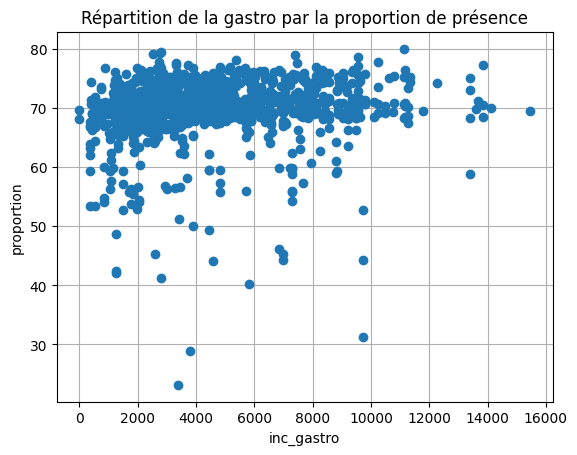

In [41]:
import matplotlib.pyplot as plt

plt.plot(df_freq_gastro["inc_gastro"],df_freq_gastro["proportion"],'o')
plt.xlabel("inc_gastro")
plt.ylabel("proportion")
plt.grid()
plt.title('Répartition de la gastro par la proportion de présence')
plt.show()

In [42]:
df_freq_gastro.corr()

,proportion,inc_gastro
proportion,1.00000,0.09691
inc_gastro,0.09691,1.00000


#### Varicelle

In [43]:
df_freq_varicelle = df_final[['proportion','inc_varicelle']]
df_freq_varicelle = df_freq_varicelle.groupby('proportion').agg({'inc_varicelle':'sum'}).reset_index()

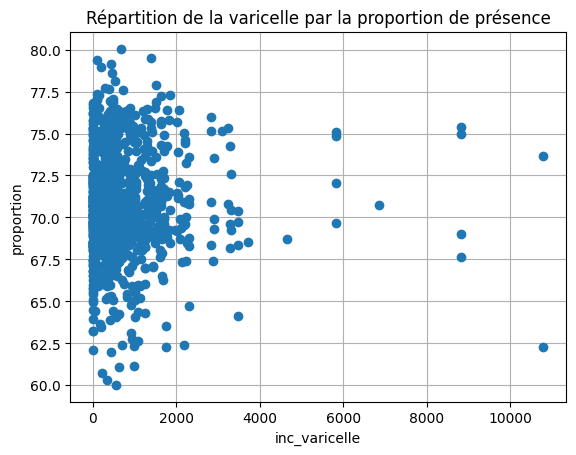

In [44]:
import matplotlib.pyplot as plt

plt.plot(df_freq_varicelle["inc_varicelle"],df_freq_varicelle["proportion"],'o')
plt.xlabel("inc_varicelle")
plt.ylabel("proportion")
plt.grid()
plt.title('Répartition de la varicelle par la proportion de présence')
plt.show()

In [45]:
df_freq_varicelle.corr()

,proportion,inc_varicelle
proportion,1.000000,-0.002128
inc_varicelle,-0.002128,1.000000


### Observe-t-on une relation entre les fêtes religieuses et la présence en cantines? ANOVAs

In [46]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Fêtes musulmanes


In [47]:
corr_musul = df_final.groupby(["fete_musulmane","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ fete_musulmane', data = corr_musul).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.415
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0359
Time:                        11:03:48   Log-Likelihood:                -2678.2
No. Observations:                1061   AIC:                             5360.
Df Residuals:                    1059   BIC:                             5370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         70.8149      0.094    754.404      0.000      70.631      70.999
fete_musulmane    -1.3114      0.624     -2.101      0.036      -2.536      -0.087
==============================================================================
Omnibus:                       10.410   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               14.158
Skew:                          -0.093   Prob(JB):                     0.000843
Kurtosis:                       3.534   Cond. No.                         6.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fêtes chrétiennes


In [48]:
corr_chret = df_final.groupby(["fete_chretienne","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ fete_chretienne', data = corr_chret).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1185
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.731
Time:                        11:03:48   Log-Likelihood:                -2684.2
No. Observations:                1063   AIC:                             5372.
Df Residuals:                    1061   BIC:                             5382.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          70.7754      0.097    731.551      0.000      70.586      70.965
fete_chretienne     0.1178      0.342      0.344      0.731      -0.554       0.789
==============================================================================
Omnibus:                        9.835   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.259
Skew:                          -0.087   Prob(JB):                      0.00132
Kurtosis:                       3.519   Cond. No.                         3.71
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Fêtes juives

In [49]:
corr_juif = df_final.groupby(["fete_juive","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ fete_juive', data = corr_juif).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.1749
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.676
Time:                        11:03:48   Log-Likelihood:                -2691.0
No. Observations:                1066   AIC:                             5386.
Df Residuals:                    1064   BIC:                             5396.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7914      0.094    753.290      0.000      70.607      70.976
fete_juive    -0.2304      0.551     -0.418      0.676      -1.312       0.851
==============================================================================
Omnibus:                       10.252   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               13.891
Skew:                          -0.092   Prob(JB):                     0.000963
Kurtosis:                       3.528   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Ramadan

In [50]:
corr_ramadan = df_final.groupby(["ramadan","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ ramadan', data = corr_ramadan).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.331
Date:                Wed, 19 Jul 2023   Prob (F-statistic):             0.0377
Time:                        11:03:48   Log-Likelihood:                -2682.1
No. Observations:                1063   AIC:                             5368.
Df Residuals:                    1061   BIC:                             5378.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.8316      0.095    742.862      0.000      70.645      71.019
ramadan       -0.8353      0.401     -2.081      0.038      -1.623      -0.048
==============================================================================
Omnibus:                        9.759   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               13.191
Skew:                          -0.085   Prob(JB):                      0.00137
Kurtosis:                       3.519   Cond. No.                         4.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observe-t-on une relation entre les menus proposées et la présences en cantines? ANOVAs

#### Porc

In [51]:
corr_porc = df_final.groupby(["porc","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ porc', data = corr_porc).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     25.32
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           5.68e-07
Time:                        11:03:48   Log-Likelihood:                -2687.4
No. Observations:                1070   AIC:                             5379.
Df Residuals:                    1068   BIC:                             5389.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.9586      0.098    721.463      0.000      70.766      71.152
porc          -1.3263      0.264     -5.032      0.000      -1.843      -0.809
==============================================================================
Omnibus:                       13.725   Durbin-Watson:                   0.039
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.592
Skew:                          -0.162   Prob(JB):                     0.000151
Kurtosis:                       3.538   Cond. No.                         2.95
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Viande

In [52]:
corr_viande = df_final.groupby(["viande","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ viande', data = corr_viande).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     265.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.33e-53
Time:                        11:03:48   Log-Likelihood:                -2563.6
No. Observations:                1062   AIC:                             5131.
Df Residuals:                    1060   BIC:                             5141.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.3303      0.126    573.632      0.000      72.083      72.578
viande        -2.7288      0.168    -16.280      0.000      -3.058      -2.400
==============================================================================
Omnibus:                      105.640   Durbin-Watson:                   0.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              215.852
Skew:                          -0.614   Prob(JB):                     1.34e-47
Kurtosis:                       4.836   Cond. No.                         2.80
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Poisson

In [53]:
corr_poisson = df_final.groupby(["poisson","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ poisson', data = corr_poisson).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     209.0
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.28e-43
Time:                        11:03:48   Log-Likelihood:                -2586.7
No. Observations:                1062   AIC:                             5177.
Df Residuals:                    1060   BIC:                             5187.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.0563      0.099    709.452      0.000      69.863      70.250
poisson        2.7952      0.193     14.457      0.000       2.416       3.175
==============================================================================
Omnibus:                       63.389   Durbin-Watson:                   0.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.583
Skew:                          -0.406   Prob(JB):                     3.97e-27
Kurtosis:                       4.445   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Bio

In [54]:
corr_bio = df_final.groupby(["bio","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ bio', data = corr_bio).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     19.47
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.12e-05
Time:                        11:03:48   Log-Likelihood:                -2690.5
No. Observations:                1070   AIC:                             5385.
Df Residuals:                    1068   BIC:                             5395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.4622      0.118    596.862      0.000      70.231      70.694
bio            0.8247      0.187      4.413      0.000       0.458       1.191
==============================================================================
Omnibus:                       13.192   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.413
Skew:                          -0.122   Prob(JB):                     0.000100
Kurtosis:                       3.595   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Noël

In [55]:
corr_noel = df_final.groupby(["noel","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ noel', data = corr_noel).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     33.20
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.09e-08
Time:                        11:03:48   Log-Likelihood:                -2661.6
No. Observations:                1060   AIC:                             5327.
Df Residuals:                    1058   BIC:                             5337.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7416      0.092    769.161      0.000      70.561      70.922
noel           6.1003      1.059      5.762      0.000       4.023       8.178
==============================================================================
Omnibus:                       11.549   Durbin-Watson:                   0.024
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.264
Skew:                          -0.150   Prob(JB):                     0.000799
Kurtosis:                       3.482   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Frites

In [56]:
corr_frites = df_final.groupby(["frites","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ frites', data = corr_frites).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.180
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.140
Time:                        11:03:48   Log-Likelihood:                -2676.9
No. Observations:                1060   AIC:                             5358.
Df Residuals:                    1058   BIC:                             5368.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7612      0.095    747.467      0.000      70.575      70.947
frites         0.7382      0.500      1.476      0.140      -0.243       1.719
==============================================================================
Omnibus:                        9.745   Durbin-Watson:                   0.031
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               13.335
Skew:                          -0.078   Prob(JB):                      0.00127
Kurtosis:                       3.527   Cond. No.                         5.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Nouvel an chinois

In [57]:
corr_an_chinois = df_final.groupby(["an_chinois","proportion"],as_index=False)[["date"]].count()
lm = ols('proportion ~ an_chinois', data = corr_an_chinois).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.3754
Date:                Wed, 19 Jul 2023   Prob (F-statistic):              0.540
Time:                        11:03:48   Log-Likelihood:                -2677.8
No. Observations:                1060   AIC:                             5360.
Df Residuals:                    1058   BIC:                             5370.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     70.7912      0.093    759.473      0.000      70.608      70.974
an_chinois    -0.9297      1.517     -0.613      0.540      -3.907       2.048
==============================================================================
Omnibus:                        9.946   Durbin-Watson:                   0.017
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               13.336
Skew:                          -0.092   Prob(JB):                      0.00127
Kurtosis:                       3.518   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Observe-t-on une corrélation entre l'incidence des maladies et les mois? ANOVA

#### Grippe

In [58]:
corr_mois_grippe = df_final.groupby(["mois","inc_grippe"],as_index=False)[["date"]].count()
lm = ols('inc_grippe ~ mois', data = corr_mois_grippe).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inc_grippe   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.370
Method:                 Least Squares   F-statistic:                     16.50
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           7.40e-23
Time:                        11:03:48   Log-Likelihood:                -2577.6
No. Observations:                 265   AIC:                             5177.
Df Residuals:                     254   BIC:                             5217.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          1013.8095    903.891      1.122      0.263    -766.266    2793.885
mois[T.Decembre]   1560.1905   1215.285      1.284      0.200    -833.129    3953.510
mois[T.Fevrier]    7972.6571   1178.530      6.765      0.000    5651.723    1.03e+04
mois[T.Janvier]    6825.4536   1126.290      6.060      0.000    4607.397    9043.510
mois[T.Juillet]    -758.4762   1917.442     -0.396      0.693   -4534.586    3017.634
mois[T.Juin]       -667.8864   1461.786     -0.457      0.648   -3546.651    2210.878
mois[T.Mai]        -813.3810   1278.295     -0.636      0.525   -3330.788    1704.026
mois[T.Mars]       2470.3195   1170.676      2.110      0.036     164.851    4775.788
mois[T.Novembre]   -120.0742   1149.629     -0.104      0.917   -2384.094    2143.946
mois[T.Octobre]    -631.2540   1330.491     -0.474      0.636   -3251.454    1988.946
mois[T.Septembre]  -715.4021   1205.188     -0.594      0.553   -3088.836    1658.032
==============================================================================
Omnibus:                      201.385   Durbin-Watson:                   0.738
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3047.194
Skew:                           2.917   Prob(JB):                         0.00
Kurtosis:                      18.554   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La grippe est relié à la saison hivernale, notamment aux mois de janvier, février et mars.

#### Gastro

In [59]:
corr_mois_gastro = df_final.groupby(["mois","inc_gastro"],as_index=False)[["date"]].count()
lm = ols('inc_gastro ~ mois', data = corr_mois_gastro).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inc_gastro   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.227
Method:                 Least Squares   F-statistic:                     11.06
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           2.59e-16
Time:                        11:03:48   Log-Likelihood:                -3153.3
No. Observations:                 344   AIC:                             6329.
Df Residuals:                     333   BIC:                             6371.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3493.8966    437.087      7.994      0.000    2634.097    4353.697
mois[T.Decembre]   2402.5265    635.715      3.779      0.000    1152.002    3653.051
mois[T.Fevrier]    1985.3034    612.962      3.239      0.001     779.538    3191.069
mois[T.Janvier]    3042.6561    580.382      5.243      0.000    1900.980    4184.333
mois[T.Juillet]   -1580.8966    939.991     -1.682      0.094   -3429.966     268.173
mois[T.Juin]       -502.8425    583.766     -0.861      0.390   -1651.177     645.492
mois[T.Mai]        -299.9229    580.382     -0.517      0.606   -1441.599     841.754
mois[T.Mars]       1653.2909    603.473      2.740      0.006     466.191    2840.391
mois[T.Novembre]   1343.2087    580.382      2.314      0.021     201.532    2484.885
mois[T.Octobre]     284.7331    629.477      0.452      0.651    -953.520    1522.987
mois[T.Septembre]  -748.6526    571.117     -1.311      0.191   -1872.105     374.799
==============================================================================
Omnibus:                       32.783   Durbin-Watson:                   0.534
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.469
Skew:                           0.773   Prob(JB):                     2.69e-09
Kurtosis:                       3.603   Cond. No.                         12.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

La gastro est relié à la saison hivernale, notamment aux mois de novembre, décembre, janvier, février et mars.

#### Varicelle

In [60]:
corr_mois_varicelle = df_final.groupby(["mois","inc_varicelle"],as_index=False)[["date"]].count()
lm = ols('inc_varicelle ~ mois', data = corr_mois_varicelle).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          inc_varicelle   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     3.007
Date:                Wed, 19 Jul 2023   Prob (F-statistic):            0.00127
Time:                        11:03:48   Log-Likelihood:                -2427.2
No. Observations:                 290   AIC:                             4876.
Df Residuals:                     279   BIC:                             4917.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           883.9615    208.732      4.235      0.000     473.071    1294.852
mois[T.Decembre]   -385.9215    298.129     -1.294      0.197    -972.790     200.947
mois[T.Fevrier]      32.5742    289.873      0.112      0.911    -538.041     603.190
mois[T.Janvier]     187.0090    277.285      0.674      0.501    -358.827     732.845
mois[T.Juillet]     238.4135    430.313      0.554      0.580    -608.658    1085.485
mois[T.Juin]        335.5090    277.285      1.210      0.227    -210.327     881.345
mois[T.Mai]         134.7141    272.370      0.495      0.621    -401.447     670.875
mois[T.Mars]        463.3242    289.873      1.598      0.111    -107.291    1033.940
mois[T.Novembre]   -498.1178    281.014     -1.773      0.077   -1051.296      55.060
mois[T.Octobre]    -529.0792    331.970     -1.594      0.112   -1182.564     124.406
mois[T.Septembre]  -517.2949    312.269     -1.657      0.099   -1131.997      97.408
==============================================================================
Omnibus:                      321.919   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15694.055
Skew:                           4.723   Prob(JB):                         0.00
Kurtosis:                      37.779   Cond. No.                         12.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Il n'y a pas de mois spécifiquement corrélé à l'incidence de la varicelle dans la population.

### Observe-t-on une corrélation entre les jours de la semaine et la fréquentation des cantines? 

In [61]:
lm = ols('proportion ~ jour', data = df_final).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             proportion   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     162.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           8.93e-87
Time:                        11:03:49   Log-Likelihood:                -2531.8
No. Observations:                1085   AIC:                             5072.
Df Residuals:                    1081   BIC:                             5092.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           70.5554      0.154    457.635      0.000      70.253      70.858
jour[T.Lundi]       -2.1635      0.217     -9.987      0.000      -2.588      -1.738
jour[T.Mardi]        0.4283      0.218      1.968      0.049       0.001       0.855
jour[T.Vendredi]     2.4930      0.213     11.681      0.000       2.074       2.912
==============================================================================
Omnibus:                      122.552   Durbin-Watson:                   0.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              281.327
Skew:                          -0.649   Prob(JB):                     8.14e-62
Kurtosis:                       5.131   Cond. No.                         4.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
df_final.jour.unique()

array(['Lundi', 'Mardi', 'Jeudi', 'Vendredi'], dtype=object)

In [63]:
df_propre = df_final.drop(df_final[df_final['greves'] == 1].index)
FM = df_propre.drop(df_propre[df_propre['vacances'] == 1].index)

In [64]:
frequentation3 = pd.get_dummies(FM.mois)
FM = FM.join(frequentation3)

In [65]:
frequentation4 = pd.get_dummies(df_final.jour)
FM = FM.join(frequentation4)

### Observe-t-on une corrélation entre l'incidence de maladies et les semaines de l'année?

In [66]:
lm = ols('inc_grippe ~ semaine', data = FM).fit()
import statsmodels.api; 
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             inc_grippe   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     222.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):           1.52e-45
Time:                        11:03:49   Log-Likelihood:                -9832.6
No. Observations:                1003   AIC:                         1.967e+04
Df Residuals:                    1001   BIC:                         1.968e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5741.0861    263.150     21.817      0.000    5224.698    6257.474
semaine     -128.2554      8.603    -14.909      0.000    -145.136    -111.374
==============================================================================
Omnibus:                      775.548   Durbin-Watson:                   0.175
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15122.081
Skew:                           3.442   Prob(JB):                         0.00
Kurtosis:                      20.733   Cond. No.                         58.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
FM.columns.unique()

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'menu', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois', 'proportion', 'Avril', 'Decembre', 'Fevrier',
       'Janvier', 'Juillet', 'Juin', 'Mai', 'Mars', 'Novembre', 'Octobre',
       'Septembre', 'Jeudi', 'Lundi', 'Mardi', 'Vendredi'],
      dtype='object')

## OLS - Ordinary Least Squares regression

OUVRIR LES FICHIERS SUIVANTS : ML SUPERVISE CORRIGE & TP2 PRATIQUER LA REGRESSION LINENAIRE - TOUS DANS LE DOSSIER ML SUPERVISE

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels


In [69]:
FM.columns

Index(['date', 'annee_scolaire', 'jour', 'semaine', 'mois', 'greves',
       'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
       'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
       'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'prevision',
       'reel', 'effectif', 'menu', 'porc', 'viande', 'poisson', 'bio', 'noel',
       'frites', 'an_chinois', 'proportion', 'Avril', 'Decembre', 'Fevrier',
       'Janvier', 'Juillet', 'Juin', 'Mai', 'Mars', 'Novembre', 'Octobre',
       'Septembre', 'Jeudi', 'Lundi', 'Mardi', 'Vendredi'],
      dtype='object')

In [70]:
anova = smf.ols('reel ~ effectif + veille_ferie +veille_vacances + viande + poisson + noel + Janvier +Juin + Juillet + Septembre + Lundi + Mardi  + Jeudi + Vendredi +inc_grippe -1' , data = FM).fit()
print(anova.summary())

                            OLS Regression Results                            
Dep. Variable:                   reel   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     655.6
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:03:49   Log-Likelihood:                -7197.8
No. Observations:                1003   AIC:                         1.443e+04
Df Residuals:                     988   BIC:                         1.450e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Janvier[False]    -1967.4733    128.76

## Régression Linéaire

In [71]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [72]:
FM_train = FM[FM['annee_scolaire'].isin(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018'])] 
FM_test = FM[FM['annee_scolaire'].isin(['2018-2019'])]

xtrain = FM_train[["effectif","viande","poisson","Fevrier","Juin","Juillet","Septembre","Lundi","Vendredi","veille_vacances","noel","veille_ferie"]]
xtest =  FM_test[["effectif","viande","poisson","Fevrier","Juin","Juillet","Septembre","Lundi","Vendredi","veille_vacances","noel","veille_ferie"]]
ytrain = FM_train[['reel']]
ytest = FM_test[['reel']]

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(866, 12)
(99, 12)
(866, 1)
(99, 1)


In [73]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
lmodellineaire = LinearRegression()
lmodellineaire.fit(xtrain, ytrain)

LinearRegression()

In [74]:
# Evaluation du training set
from sklearn.metrics import r2_score
y_train_predict = lmodellineaire.predict(xtrain)
rmse = (np.sqrt(mean_squared_error(ytrain, y_train_predict)))
r2 = r2_score(ytrain, y_train_predict)
 
print('La performance du modèle sur la base dapprentissage')
print('--------------------------------------')
print('Lerreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))
print('\n')
 
# model evaluation for testing set
y_test_predict = lmodellineaire.predict(xtest)
rmse = (np.sqrt(mean_squared_error(ytest, y_test_predict)))
r2 = r2_score(ytest, y_test_predict)
 
print('La performance du modèle sur la base de test')
print('--------------------------------------')
print('L erreur quadratique moyenne est {}'.format(rmse))
print('le score R2 est {}'.format(r2))

La performance du modèle sur la base dapprentissage
--------------------------------------
Lerreur quadratique moyenne est 303.6467490170718
le score R2 est 0.885134963568997


La performance du modèle sur la base de test
--------------------------------------
L erreur quadratique moyenne est 464.20063976022533
le score R2 est 0.464126439087425


In [75]:
FM.annee_scolaire.unique()

array(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015',
       '2015-2016', '2016-2017', '2017-2018', '2018-2019', '2019-2020'],
      dtype=object)

## Ridge Regression

In [76]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Préparation des données
FM_train = FM[FM['annee_scolaire'].isin(['2010-2011', '2011-2012', '2012-2013', '2013-2014', '2014-2015','2015-2016', '2016-2017', '2017-2018'])] 
FM_test = FM[FM['annee_scolaire'].isin(['2018-2019'])]

X_train = FM_train[["effectif","viande","poisson","Fevrier","Juin","Juillet","Septembre","Lundi","Vendredi","veille_vacances","noel","veille_ferie"]]
X_test =  FM_test[["effectif","viande","poisson","Fevrier","Juin","Juillet","Septembre","Lundi","Vendredi","veille_vacances","noel","veille_ferie"]]
Y_train = FM_train[['reel']]
Y_test = FM_test[['reel']]

# Modèle Ridge
ridge = Ridge(alpha=1.0)  # Choisis une valeur appropriée pour alpha

# Entraînement du modèle
ridge.fit(X_train, Y_train)

# Prédiction
Y_pred = ridge.predict(X_test)

# Évalue les performances du modèle
mse = mean_squared_error(Y_test, Y_pred)

In [77]:
Y_pred = ridge.predict(X_test)

# Créer un dataframe à partir des prédictions
df_pred = pd.DataFrame(Y_pred, columns=['pred'])
 
# Filtrer les données réelles sur l'année 2019-2020
df_reel_2019_2020 = FM[FM['annee_scolaire'] == '2019-2020'][['reel']]

# Filtrer les données réelles sur l'année 2019-2020
df_prev_2019_2020 = FM[FM['annee_scolaire'] == '2019-2020'][['prevision']]

reel = df_reel_2019_2020.reset_index().drop(columns='index')
prev = df_prev_2019_2020.reset_index().drop(columns='index')
pred = df_pred
df_differences = pd.DataFrame({'reel': reel['reel'], 'prev': prev['prevision'], 'pred': pred['pred']})
df_differences['différence-reel-prev'] = df_differences['prev'] - df_differences['reel']
df_differences['différence-reel-pred'] = df_differences['pred'] - df_differences['reel']
df_differences.dropna()

,reel,prev,pred,différence-reel-prev,différence-reel-pred
0,13750.0,14621.0,14899.880794,871.0,1149.880794
1,15186.0,15742.0,14538.468965,556.0,-647.531035
2,14286.0,14981.0,15027.553841,695.0,741.553841
3,14681.0,15170.0,14538.468965,489.0,-142.531035
4,15477.0,16192.0,14538.468965,715.0,-938.531035
5,14384.0,15004.0,15112.962436,620.0,728.962436
6,15262.0,15621.0,14093.534883,359.0,-1168.465117
7,14780.0,15426.0,14538.468965,646.0,-241.531035
8,15720.0,16169.0,14538.468965,449.0,-1181.531035
9,14741.0,15028.0,15112.962436,287.0,371.962436


## Cross-validation

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
FM

,date,annee_scolaire,jour,semaine,mois,greves,veille_ferie,retour_ferie,vacances,retour_vacances,...,Juin,Mai,Mars,Novembre,Octobre,Septembre,Jeudi,Lundi,Mardi,Vendredi
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,1,...,False,False,False,False,False,False,False,True,False,False
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,...,False,False,False,True,False,False,False,False,True,False
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,...,False,False,False,True,False,False,True,False,False,False
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,True


In [79]:
# DataFrame existant
FM
# Colonnes à sélectionner
colonnes_selectionnees = ["effectif","viande","poisson","Fevrier","Juin","Juillet","Septembre","Lundi","Vendredi","veille_vacances","noel","veille_ferie","proportion"]

# Créer un nouveau DataFrame avec les colonnes sélectionnées
FM_cross = FM.loc[:, colonnes_selectionnees]
FM_cross


,effectif,viande,poisson,Fevrier,Juin,Juillet,Septembre,Lundi,Vendredi,veille_vacances,noel,veille_ferie,proportion
0,17373,1,0,False,False,False,False,True,False,0,0,0,64.059172
1,17373,1,0,False,False,False,False,False,False,0,0,0,67.967536
2,17373,1,0,False,False,False,False,False,False,0,0,0,67.581880
3,17373,0,1,False,False,False,False,False,True,0,0,0,70.926150
4,17373,0,1,False,False,False,False,True,False,0,0,0,65.054970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,20685,0,0,False,False,False,False,True,False,0,0,0,73.207638
1178,20685,1,0,False,False,False,False,False,False,0,0,0,77.128354
1179,20685,1,0,False,False,False,False,False,False,0,0,0,71.858835
1180,20685,0,1,False,False,False,False,False,True,0,0,0,79.395697


In [80]:
X = FM_cross[FM_cross.columns[:-1]].values
y = FM_cross['proportion'].values

In [81]:
y_class = np.where(y<6, 0, 1)

In [82]:
from sklearn import model_selection
xtrain, xtest, ytrain, ytest = \
    model_selection.train_test_split(X, y_class, test_size=0.3) # 30% des données dans le jeu de test
                               